In [133]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [134]:
#Step 1: Reading the dataset
img_path = 'C:/Users/User/Desktop/New_project/thainumber/'

In [135]:
number_label = ['0','1','2','3','4','5','6','7','8','9']

In [136]:
img_list = []
label_list = []
for label in number_label:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)
        
df = pd.DataFrame({'img':img_list, 'label':label_list})

In [137]:
df.head()

,img,label
0,C:/Users/User/Desktop/New_project/thainumber/0...,0
1,C:/Users/User/Desktop/New_project/thainumber/0...,0
2,C:/Users/User/Desktop/New_project/thainumber/0...,0
3,C:/Users/User/Desktop/New_project/thainumber/0...,0
4,C:/Users/User/Desktop/New_project/thainumber/0...,0


In [138]:
df['label'].value_counts()

0    30
1    30
2    30
3    30
4    30
5    30
6    30
7    30
8    30
9    30
Name: label, dtype: int64

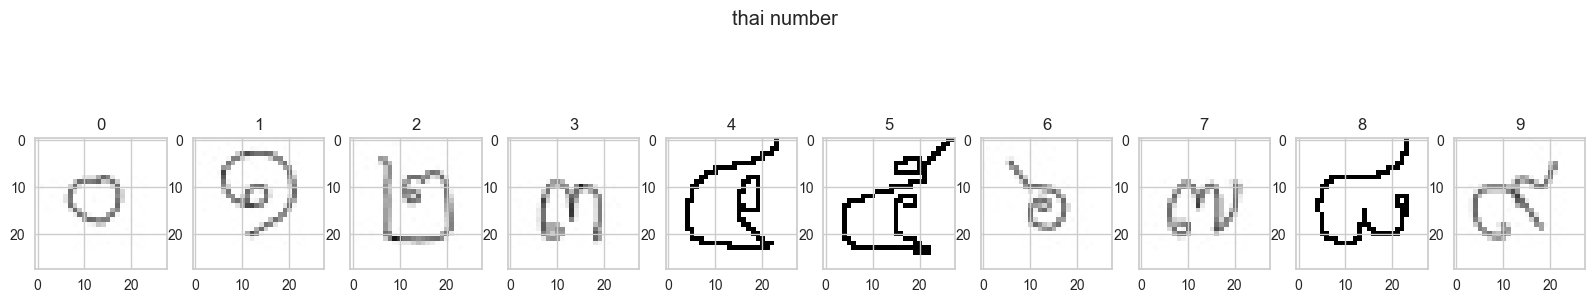

In [139]:
#2. Show sample images
#show image
fig, ax = plt.subplots(ncols=len(number_label), figsize=(20,4))
fig.suptitle('thai number')
random_num = 12
for i,label in enumerate(number_label):
    ax[i].set_title(label)
    ax[i].imshow(plt.imread(df[df['label']==label]['img'].iloc[random_num]))

In [140]:
plt.imread(df['img'][0]).shape

(28, 28, 3)

In [141]:
#Step 3: Data preprocessing
# Create a dataframe for mapping label
df_labels = {
    '0' : 0,
    '1' : 1,
    '2' : 2,
    '3' : 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '9': 9
}
# Encode
df['encode_label'] = df['label'].map(df_labels)
df.tail()

,img,label,encode_label
295,C:/Users/User/Desktop/New_project/thainumber/9...,9,9
296,C:/Users/User/Desktop/New_project/thainumber/9...,9,9
297,C:/Users/User/Desktop/New_project/thainumber/9...,9,9
298,C:/Users/User/Desktop/New_project/thainumber/9...,9,9
299,C:/Users/User/Desktop/New_project/thainumber/9...,9,9


In [142]:
def moveup(img):
    while True:
        if np.all(img[0] >= 240):
            img = img[1:]
        else:
            break
    return img

def movedown(img):
    while True:
        if np.all(img[-1] >= 240):
            img = img[:-1]
        else:
            break
    return img

def moveleft(img):
    while True:
        if np.all(img[:, 0] >= 240):
            img = img[:, 1:]
        else:
            break
    return img

def moveright(img):
    while True:
        if np.all(img[:, -1] >= 240):
            img = img[:, :-1]
        else:
            break
    return img

def rescale(img):
    img = moveup(img)
    img = movedown(img)
    img = moveleft(img)
    img = moveright(img)
    return img

In [143]:
input_dir = 'C:/Users/User/Desktop/New_project/thainumber/'
data = []
labels = []

for category_idx, category in enumerate(number_label):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        img = cv2.imread(img_path)
        img = rescale(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (28, 28))
        img = img.flatten()
        data.append(img)
        labels.append(category_idx)

data = np.asarray(data)
labels = np.asarray(labels)

In [144]:
df = pd.DataFrame(data)
df['labels'] = labels
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,labels
295,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,9
296,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,9
297,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,9
298,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,9
299,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,9


In [145]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

In [146]:
#EDA
# 1. How many training sample and test sample we have ?
# 2. What is the size of the images ?
# 3. What is the proportion of each observed category ?

In [147]:
IMAGE_SIZE = (28, 28)
n_train = x_train.shape[0]
n_test = x_test.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 240
Number of testing examples: 60
Each image is of size: (28, 28)


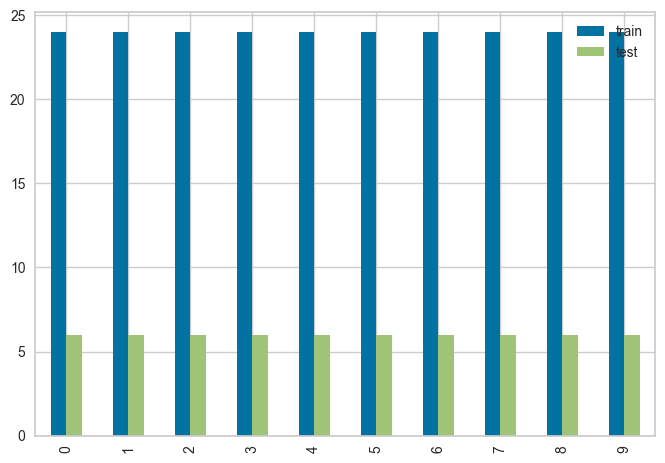

In [148]:
import pandas as pd

_, train_counts = np.unique(y_train, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=number_label
            ).plot.bar()
plt.show()

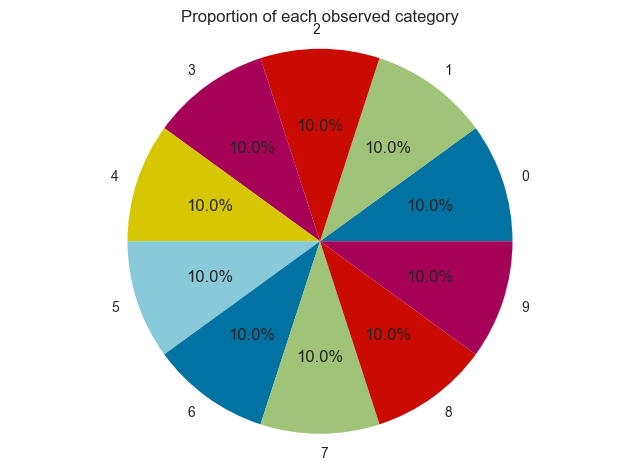

In [149]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0 , 0, 0, 0, 0) , 
        labels=number_label,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [150]:
s = setup(data = df, target = 'labels', session_id=123 , train_size= 0.7)

,Description,Value
0,Session id,123
1,Target,labels
2,Target type,Multiclass
3,Original data shape,"(300, 785)"
4,Transformed data shape,"(300, 785)"
5,Transformed train set shape,"(210, 785)"
6,Transformed test set shape,"(90, 785)"
7,Numeric features,784
8,Preprocess,True
9,Imputation type,simple


In [151]:
best_model = compare_models(sort = 'Accuracy', fold = 5 , n_select= 3)

In [152]:
print(best_model)

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes

In [153]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [154]:
dt = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9048,1.0000,0.9048,0.9325,0.8971,0.8937,0.8982
1,0.9048,0.9850,0.9048,0.8413,0.8667,0.8939,0.9008
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9524,1.0000,0.9524,0.9683,0.9492,0.9470,0.9494
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9524,1.0000,0.9524,0.9683,0.9524,0.9471,0.9495
6,1.0000,0.9975,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9048,0.9962,0.9048,0.9325,0.8971,0.8937,0.8982
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [155]:
# trained model object is stored in the variable 'dt'. 
print(dt)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)


In [156]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9524,0.9975,0.9524,0.9643,0.9478,0.9468,0.9493
1,0.8571,0.9825,0.8571,0.9008,0.8463,0.8405,0.8470
2,0.9524,0.9950,0.9524,0.9683,0.9492,0.9470,0.9494
3,0.9524,1.0000,0.9524,0.9683,0.9492,0.9470,0.9494
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9524,0.9875,0.9524,0.9683,0.9492,0.9470,0.9494
7,0.8571,0.9925,0.8571,0.9008,0.8463,0.8405,0.8470
8,1.0000,0.9873,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


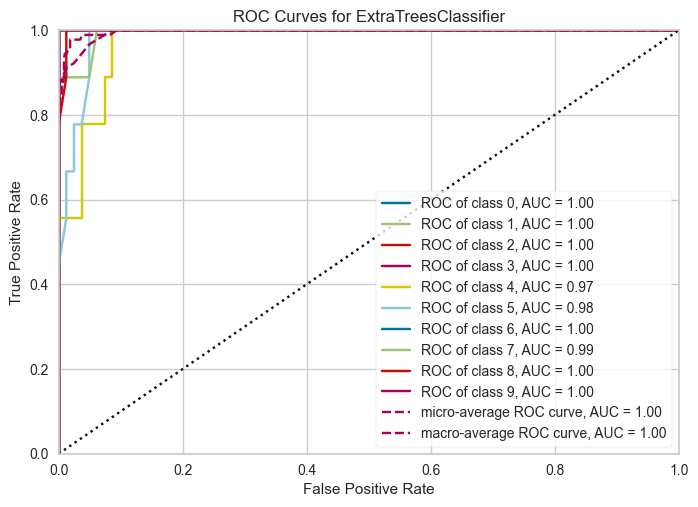

In [157]:
plot_model(tuned_dt, plot = 'auc')

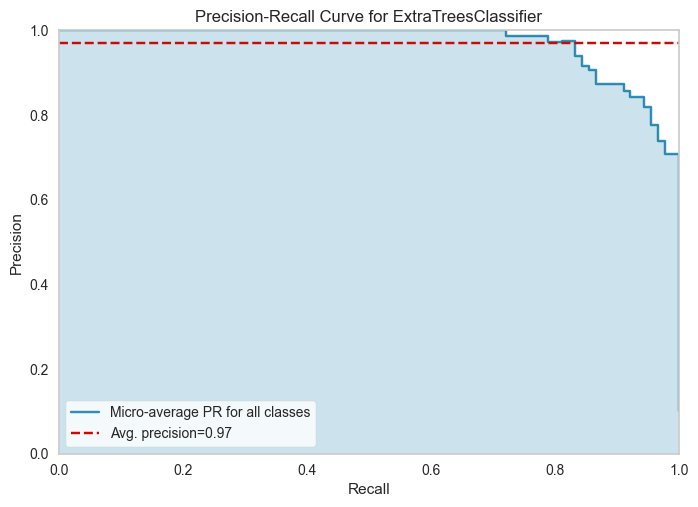

In [158]:
#Precision-Recall Curve
plot_model(tuned_dt, plot = 'pr')

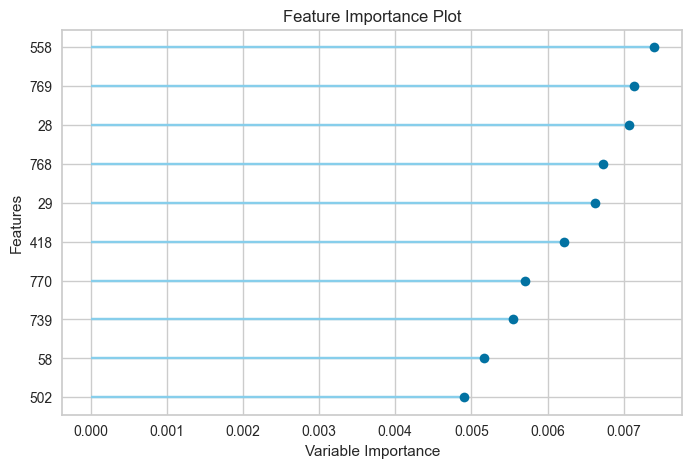

In [159]:
#Feature Importance Plot
plot_model(tuned_dt, plot='feature')

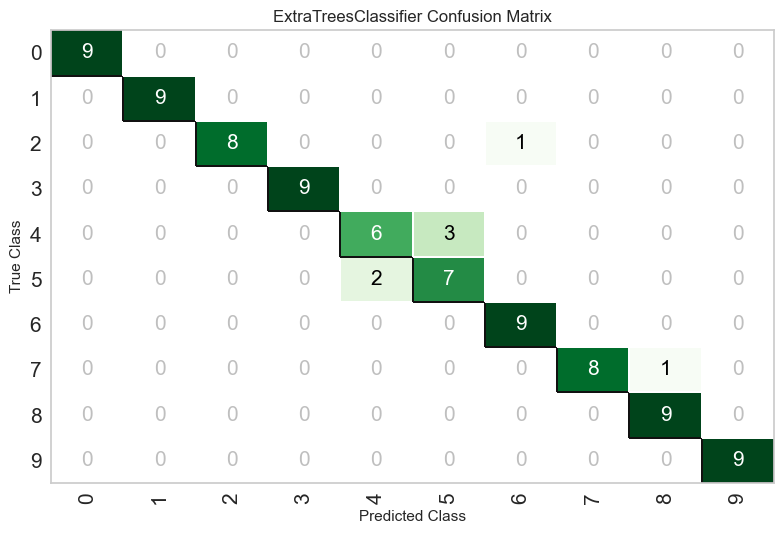

In [160]:
plot_model(tuned_dt, plot = 'confusion_matrix')

In [171]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [162]:
predict_model(tuned_dt);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9222,0.9951,0.9222,0.9250,0.9220,0.9136,0.9140


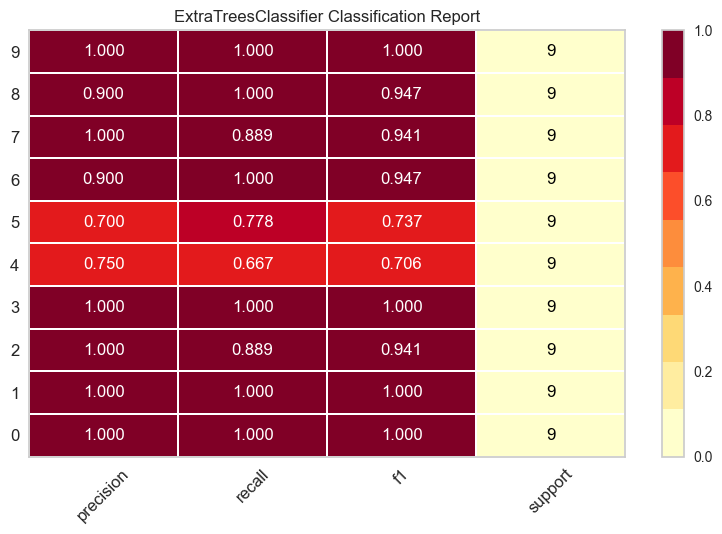

In [166]:
plot_model(tuned_dt, plot = 'class_report')